In [1]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
%run -i ../../bench.py

In [3]:
data_sm_50_path = os.path.join('data_sm_50.json')
data_sm_100_path = os.path.join('data_sm_100.json')
data_sm_300_path = os.path.join('data_sm_300.json')
data_sm_600_path = os.path.join('data_sm_600.json')
data_sm_1000_path = os.path.join('data_sm_1000.json')
data_med_50_path = os.path.join('data_med_50.json')
data_med_100_path = os.path.join('data_med_100.json')
data_med_300_path = os.path.join('data_med_300.json')
data_med_600_path = os.path.join('data_med_600.json')
data_med_1000_path = os.path.join('data_med_1000.json')
data_lar_50_path = os.path.join('data_lar_50.json')
data_lar_100_path = os.path.join('data_lar_100.json')
data_lar_300_path = os.path.join('data_lar_300.json')
data_lar_600_path = os.path.join('data_lar_600.json')
data_lar_1000_path = os.path.join('data_lar_1000.json')

In [4]:
def mode_within(data_array, percent):
    max_sum_freq = 0
    mode = data_array[0]

    for check_val in set(data_array):
        sum_freq = sum(1 for ele in data_array if abs(ele - check_val) <= abs(percent * check_val / 100))

        if sum_freq > max_sum_freq:
            mode = check_val
            max_sum_freq = sum_freq

    return mode
def gen_param_func(data_tensor_array):
    # for 1 column, just have 1 element in tensor array
    data = data_tensor_array[0].reshape(-1).numpy()
    return [torch.tensor(mode_within(data,1))]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            count_equal = torch.sum((torch.abs(X-self.w)<=torch.abs(0.01*self.w)).double())
            result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
            return (torch.sum(result) == X.size()[1], self.w)

    return verifier_model

Summary of Proving Time (1% accuracy)

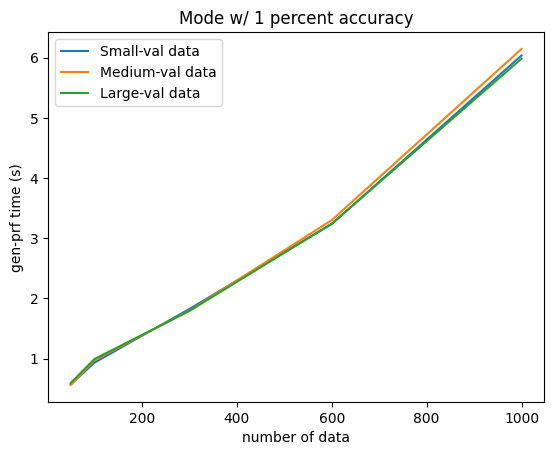

In [32]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
sm_time = [0.5686647891998291, 0.9327430725097656, 1.8243849277496338, 3.2371439933776855, 6.038832902908325]
plt.title("Mode w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

med_time = [0.5626211166381836, 0.9744749069213867, 1.7960751056671143, 3.3007750511169434, 6.14612078666687]
plt.plot(data_number, med_time, label = 'Medium-val data')

lar_time = [0.5944938659667969, 0.9927859306335449, 1.7916460037231445, 3.241201877593994, 5.985101699829102]
plt.plot(data_number, lar_time, label = 'Large-val data')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [5]:
bench_one([data_sm_50_path], model_func,gen_param_func, "50 small values","default", "resources")

=====================================  50 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":12,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":50,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.5686647891998291
Theory result:  tensor(0.9380, dtype=torch.float64)
Our result:  [0.9375]


In [6]:
bench_one([data_sm_100_path], model_func,gen_param_func, "100 small values","default", "resources")

=====================================  100 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":100,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9327430725097656
Theory result:  tensor(0.9910, dtype=torch.float64)
Our result:  [0.990234375]


In [7]:
bench_one([data_sm_300_path], model_func,gen_param_func, "300 small values","default", "resources")

=====================================  300 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":300,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.8243849277496338
Theory result:  tensor(0.8190, dtype=torch.float64)
Our result:  [0.818359375]


In [10]:
bench_one([data_sm_600_path], model_func,gen_param_func, "600 small values","default", "resources")

=====================================  600 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":600,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.2371439933776855
Theory result:  tensor(0.9510, dtype=torch.float64)
Our result:  [0.951171875]


In [11]:
bench_one([data_sm_1000_path], model_func,gen_param_func, "1000 small values","default", "resources")

=====================================  1000 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":1000,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  6.038832902908325
Theory result:  tensor(0.9500, dtype=torch.float64)
Our result:  [0.94921875]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [15]:
# can use "default" which will set to scale 8, which results in similar circuit size to scale = 3
bench_one([data_med_50_path], model_func,gen_param_func, "50 medium values","default", "resources")

=====================================  50 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":12,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":50,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.5626211166381836
Theory result:  tensor(46.1000, dtype=torch.float64)
Our result:  [46.099609375]


In [22]:
bench_one([data_med_100_path], model_func,gen_param_func, "100 medium values","default", "resources")

=====================================  100 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":100,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9744749069213867
Theory result:  tensor(90.5000, dtype=torch.float64)
Our result:  [90.5]


In [23]:
bench_one([data_med_300_path], model_func,gen_param_func, "300 medium values","default", "resources")

=====================================  300 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":300,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.7960751056671143
Theory result:  tensor(77., dtype=torch.float64)
Our result:  [77.0]


In [24]:
bench_one([data_med_600_path], model_func,gen_param_func, "600 medium values","default", "resources")

=====================================  600 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":600,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.3007750511169434
Theory result:  tensor(97.9000, dtype=torch.float64)
Our result:  [97.900390625]


In [20]:
bench_one([data_med_1000_path], model_func,gen_param_func, "1000 medium values","default", "resources")

=====================================  1000 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":1000,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  6.14612078666687
Theory result:  tensor(80.5000, dtype=torch.float64)
Our result:  [80.5]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [26]:
bench_one([data_lar_50_path], model_func,gen_param_func, "50 large values","default", "resources")

=====================================  50 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":12,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":50,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.5944938659667969
Theory result:  tensor(8594., dtype=torch.float64)
Our result:  [8594.0]


In [27]:
bench_one([data_lar_100_path], model_func,gen_param_func, "100 large values","default", "resources")

=====================================  100 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":100,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9927859306335449
Theory result:  tensor(8689., dtype=torch.float64)
Our result:  [8689.0]


In [28]:
bench_one([data_lar_300_path], model_func,gen_param_func, "300 large values","default", "resources")

=====================================  300 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":300,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.7916460037231445
Theory result:  tensor(9021., dtype=torch.float64)
Our result:  [9021.0]


In [29]:
bench_one([data_lar_600_path], model_func,gen_param_func, "600 large values","default", "resources")

=====================================  600 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":600,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  3.241201877593994
Theory result:  tensor(9241., dtype=torch.float64)
Our result:  [9241.0]


In [30]:
bench_one([data_lar_1000_path], model_func,gen_param_func, "1000 large values","default", "resources")

=====================================  1000 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_53002/2159247531.py:26: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  result = torch.tensor([torch.sum((torch.abs(X-ele[0])<=torch.abs(0.01*ele[0])).double())<=count_equal for ele in X[0]])
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[0,0],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":1000,"total_const_size":0,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":[],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.985101699829102
Theory result:  tensor(8540., dtype=torch.float64)
Our result:  [8540.0]
